In [47]:
%matplotlib widget
from tvregdiffmaster.tvregdiff import TVRegDiff
import numpy as np
import scipy.signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from Funciones_auxiliares import plots_hierarchichal_clustering,get_cluster_indexs

Intentamos ver si usando la derivada para seniales ruidosas obtenemos una derivada y una dervada segunda
que puedan reproducir la senial original a partir de la integracion numerica

Ejemplo con la funcion abs(x)

In [39]:
t=np.linspace(0,1,100)
x = np.abs(t-1/2)+np.random.normal(0,.05,len(t))
dx=TVRegDiff(x, 7000, 0.2,ep=10e-6,plotflag=0,diagflag=0)

In [40]:
spl = UnivariateSpline(t, dx[:-1],s=0)
integral = spl.antiderivative()

In [41]:
plt.figure(2,[15,5])
plt.subplot(121)
plt.plot(dx[:-1],'.-',label='Numerica')
plt.axhline(-1,0,0.5,color='k',label='Exacta')
plt.axhline(1,0.5,1,color='k')
plt.axvline(50,0.05,0.95,color='k')
plt.xlabel('x',fontsize=12)
plt.ylabel('df/dx',fontsize=12)
plt.legend(fontsize=12)
plt.subplot(122)
plt.xlabel('x',fontsize=12)
plt.ylabel('f',fontsize=12)
plt.plot(t,integral(t)+0.5,label='Numerica (reconstruida)')
plt.plot(t,np.abs(t-1/2),'k',label='Exacta (sin ruido)')
plt.legend(fontsize=12)

plt.figure(1,[7,6])
plt.plot(t,x)
plt.xlabel('x',fontsize=15)
plt.ylabel('f',fontsize=12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'f')

# Ahora con una senial neuronal

In [44]:
import pandas as pd
data = '/home/lorenzo/Principal/Noise-Neuron discriminator/Datos/PCCIBNMZc'
data = pd.read_pickle(data)

Neurons = data[data.bNoise == 0]
Neurons.reset_index(inplace = True)

In [45]:
fig,axes,fl = plots_hierarchichal_clustering(Neurons)

/home/lorenzo/Principal/Sindy/Funciones_auxiliares.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean'] = (df['Mean'] - df.Mean.apply(lambda row:np.mean(row)))/df.Mean.apply(lambda  row:np.std(row))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
Cluster_selected = get_cluster_indexs(14,fl)
Emb = Neurons.loc[Cluster_selected]
x = np.concatenate(Emb.Mean.values)
x = x[:64]
x = (x - np.mean(x))/np.std(x)
x = x - x[0]

Senial original

In [62]:
plt.figure()

t = np.arange(len(x))
x_interp = UnivariateSpline(t,x,s = 0)
t2 = np.linspace(0,len(x),1000)
x_interp = x_interp(t2)

plt.plot(t,x)
plt.plot(t2,x_interp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Derivada usando TVReg

In [63]:
dx=TVRegDiff(x_interp, 7000,alph = 0.1,ep=10e-6,plotflag=0,diagflag=0)
plt.figure()
plt.plot(dx)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
spl = UnivariateSpline(np.arange(64), dx[:-1],s=0)
integral = spl.antiderivative()

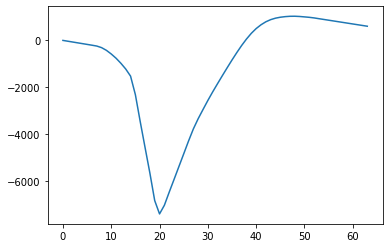

In [32]:
x = integral(np.arange(64))
plt.plot(x)

#### parece funcionar bien, salvo por el hecho de que los valores de la derivada se van al carajo

#### Que pasa si interpolamos?

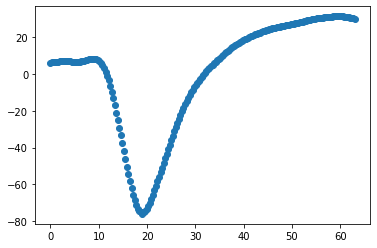

In [31]:
import scipy.interpolate

neuron_interpolated = scipy.interpolate.interp1d(np.arange(64),neuron.Mean)
t =np.linspace(0,62.99,200)
neuron_interpolated = neuron_interpolated(t)
plt.scatter(t,neuron_interpolated)


In [64]:
#dx=TVRegDiff(neuron_interpolated, 7000, 0.2,ep=10e-6,plotflag=0,diagflag=0)
plt.figure()
plt.plot(t,dx[:-1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: x and y must have same first dimension, but have shapes (64,) and (1000,)

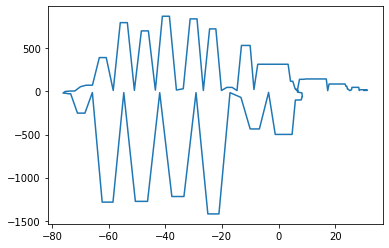

In [37]:
plt.figure()
plt.plot(neuron_interpolated,dx[:-1])

In [33]:
spl = UnivariateSpline(t, dx[:-1],s=0)
integral = spl.antiderivative()

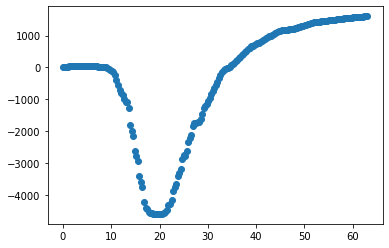

In [34]:
integral = integral(t)
plt.figure()
plt.scatter(t,integral)

### Conclusion
No parece que esto vaya a funcionar

In [16]:
x

array([  4.17120573,   3.47139153,   2.88055048,   2.34267621,
         1.76043785,   1.08723583,   0.37133759,  -0.31919609,
        -1.05372883,  -1.99849612,  -3.12122922,  -4.1577232 ,
        -5.20912344,  -7.56364355, -13.91996216, -27.2087923 ,
       -47.92603885, -71.84268624, -91.11603299, -99.1439526 ,
       -95.04672791, -83.50699094, -70.60791467, -59.98136828,
       -52.06263018, -45.65814351, -39.64681366, -33.68004858,
       -28.01632719, -23.03197498, -18.83463802, -15.18500349,
       -11.72698621,  -8.28704771,  -4.93782148,  -1.83108215,
         0.97113918,   3.50818655,   5.79438873,   7.78958778,
         9.5269733 ,  11.13011295,  12.67537155,  14.11556337,
        15.32849016,  16.22689137,  16.82680771,  17.2042266 ,
        17.45352815,  17.71357248,  18.10628626,  18.59172179,
        18.96658756,  19.01133738,  18.65793648,  18.0949148 ,
        17.61267521,  17.2752654 ,  16.90534435,  16.38348826,
        15.78053906,  15.24199055,  14.86429982,  14.65

In [17]:
len(x)

64